### 1. ¿Qué es un paradigma de programación?

Un paradigma de programación es un enfoque o estilo que guía el diseño y la estructura de programas de computadora. Define un conjunto de principios y metodologías que los programadores siguen al escribir código para resolver problemas. Los paradigmas de programación determinan cómo se estructuran los programas y cómo se deben organizar las instrucciones para ejecutar un programa. Estos se desglosan de una programación imperativa y declarativa.

Existen principalmente 2 paradigmas:

- Programación Funcional
- Programación Orientada a Objetos (POO en español - OOP en inglés)


### 2. ¿En qué se basa la programación orientada a objetos?

La programación orientada a objetos es un paradigma de programación que se basa en el concepto de "objetos", los cuales representan entidades o cosas del mundo real. Cada objeto es una instancia de una "clase" que define tanto los atributos (propiedades o datos) como los métodos (funciones o comportamientos) que ese objeto puede tener.

Se basa en 4 principios fundamentales:

- Encapsulamiento
- Herencia
- Polimorfismo
- Abstracción

### 3. ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big 𝑂?

La **recursividad** es una técnica en la que una función se llama a sí misma para resolver un problema, dividiéndolo en subproblemas más pequeños hasta alcanzar una condición base. Por otro lado, la iteración utiliza estructuras de control como bucles (for, while) para repetir un bloque de código hasta cumplir una condición determinada.

En términos de complejidad computacional (notación Big O), la recursividad y la iteración pueden tener la misma eficiencia para ciertos problemas, pero no siempre. Un algoritmo recursivo mal diseñado puede generar un gran número de llamadas, aumentando la complejidad a niveles no deseados (ej., $O(2^n)$), mientras que una solución iterativa puede ser más eficiente (ej., $O(n)$). Sin embargo, hay casos donde la recursividad es más intuitiva y resulta en una mejor organización del código, a pesar de tener el mismo orden de complejidad que una versión iterativa.

### 4. Explicar la diferencia de rendimiento entre $O(1)$ y $O(𝑛)$

La diferencia de rendimiento entre $O(1)$ y $O(n)$ se ve en cómo el tiempo de ejecución del algoritmo varía con el tamaño de la entrada.

- **$O(1)$**: Se refiere a tiempo constante, es decir, el tiempo de ejecución no cambia sin importar el tamaño de la entrada. Un ejemplo podría ser una función que recibe parámetros y retorna una operación aritmética concreta,

- **$O(n)$**: Indica tiempo lineal, lo que significa que el tiempo de ejecución crece proporcionalmente al tamaño de la entrada. Un ejemplo puede ser un bucle que recorre todos los elementos de una lista de tamaño $n$.

### 5. ¿Cómo se calcula el orden en un programa que funciona por etapas?

El orden de complejidad en un programa que funciona por etapas se calcula sumando las complejidades de cada etapa si se ejecutan de manera secuencial. Sin embargo, cuando una etapa está anidada dentro de otra (como un bucle dentro de otro), las complejidades se multiplican.

Por ejemplo, si tienes una etapa con complejidad $O(n)$ seguida de otra etapa con complejidad $O(m)$, la complejidad total será $O(n + m)$. Si en cambio las etapas están anidadas, como un bucle de $O(n)$ dentro de otro de $O(m)$, la complejidad resultante será $O(n \cdot m)$. Por ejemplo al recorrer una matriz de $n$ columnas y $n$ filas, se obtiene una complejidad de $O(n^2)$.

### 6. ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?

La complejidad temporal de un algoritmo recursivo se puede determinar mediante la resolución de la ecuación de recurrencia y luego utilizar el Teorema Maestro. Para ello, se debe expresar el tiempo de ejecución del algoritmo como una función recursiva que describe cómo el problema se divide en subproblemas más pequeños.

Se deben obtener los parámetros $p$, $q$ y $Cn^r$ para luego observar su complejidad mediante el teorema según el caso a evaluar.

## Caminos en una PCB

#### Se realizará mediante tres paradigmas, recursivo, iterativo y combinatorial.

In [15]:
from math import comb
import time
import matplotlib.pyplot as plt

In [16]:
# Se define la clase PCB, en donde se recorren los caminos posibles mediante tres funciones
# que utilizan recursividad, iteratividad y combinatoria en su paradigma de implementación.

# Inciso 4
# Decorador para medir el tiempo de ejecución
def execute_time(func):
    def nueva_func(*args):
        inicio = time.time()
        resultado = func(*args)
        fin = time.time()
        tiempo_ejecucion = fin - inicio
        print("Se tarda:", tiempo_ejecucion,"segundos")
        return resultado, tiempo_ejecucion
    return nueva_func

# Inciso 3
# Decorador de almacenaje de tiempos
def time_saver(func):
    def nueva_func(self, *args):
        inicio = time.time()
        resultado = func(self, *args)
        fin = time.time()
        tiempo_ejecucion = fin - inicio
        
        # Se guardan los tiempos en una estructura interna de la clase
        if not hasattr(self, 'tiempos_ejecucion'):
            self.tiempos_ejecucion = {}

        self.tiempos_ejecucion[func.__name__] = tiempo_ejecucion    
           
        return resultado, tiempo_ejecucion
    
    return nueva_func

# Inciso 1
class PCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M

    # Recursividad
    def caminos_recursivo(self, x, y):
        # if destino
        if x == self.N - 1 and y == self.M - 1:
            return 1
        # fuera de límites
        if x >= self.N or y >= self.M:
            return 0
        return self.caminos_recursivo(x + 1, y) + self.caminos_recursivo(x, y + 1)
    
    # Iteratividad
    def caminos_iterativo(self):
        tabla = [[0 for _ in range(self.M)] for _ in range(self.N)]
        
        # Punto A
        for i in range(self.N):
            tabla[i][0] = 1
        for j in range(self.M):
            tabla[0][j] = 1

        # Llenar la tabla iterativamente
        for i in range(1, self.N):
            for j in range(1, self.M):
                tabla[i][j] = tabla[i - 1][j] + tabla[i][j - 1]

        # Combinaciones posibles
        return tabla[self.N - 1][self.M - 1]
    
    # Combinatorial
    def caminos_combinatoria(self):
        return comb(self.N + self.M - 2, self.N - 1)
    
    # Llamados de funciones
    
    def ejecutar_recursivo(self):
        return self.caminos_recursivo(0, 0)
    
    
    def ejecutar_iterativo(self):
        return self.caminos_iterativo()
    
    
    def ejecutar_combinatoria(self):
        return self.caminos_combinatoria()
    
    # Nuevo método para ejecutar el paradigma solicitado
    @time_saver
    def paradigma(self, paradigma):
        if paradigma == "recursivo":
            return self.caminos_recursivo(0, 0)
        elif paradigma == "iterativo":
            return self.caminos_iterativo()
        elif paradigma == "combinatorial":
            return self.caminos_combinatoria()

    # Inciso 2
    # Tiempo de ejecución
    def execute_time(self, func, *args):
        inicio = time.time()
        resultado = func(*args)
        fin = time.time()
        tiempo_ejecucion = fin - inicio
        print("Se tarda:", tiempo_ejecucion, "segundos")
        return resultado
    
    

In [17]:
pcb = PCB(10, 10)

# Tests
assert pcb.caminos_recursivo(0, 0) == pcb.caminos_iterativo() == pcb.caminos_combinatoria()

In [18]:
# Tiempo de ejecución y cantidad de caminos posibles
print(pcb.execute_time(pcb.caminos_recursivo, 0, 0))
print()
print(pcb.execute_time(pcb.caminos_iterativo))
print()
print(pcb.execute_time(pcb.caminos_combinatoria))

Se tarda: 0.030027151107788086 segundos
48620

Se tarda: 0.0 segundos
48620

Se tarda: 0.0 segundos
48620


In [19]:
# Tests con decoradores
print(pcb.paradigma("recursivo"))
print(pcb.paradigma("iterativo"))
print(pcb.paradigma("combinatorial"))

(48620, 0.027025699615478516)
(48620, 0.0)
(48620, 0.0)


In [20]:
# Graficador de tiempos
def graficar_tiempos(size):
    sizes = list(range(2, size + 1))
    tiempos_recursivo = []
    tiempos_iterativo = []
    tiempos_combinatorial = []

    for size in sizes:
        pcb = PCB(size, size)
        _, tiempo_recursivo = pcb.paradigma("recursivo")
        _, tiempo_iterativo = pcb.paradigma("iterativo")
        _, tiempo_combinatorial = pcb.paradigma("combinatorial")
        
        tiempos_recursivo.append(tiempo_recursivo)
        tiempos_iterativo.append(tiempo_iterativo)
        tiempos_combinatorial.append(tiempo_combinatorial)

    plt.plot(sizes, tiempos_recursivo, label="Recursivo")
    plt.plot(sizes, tiempos_iterativo, label="Iterativo")
    plt.plot(sizes, tiempos_combinatorial, label="Combinatorial")

    plt.title("Tiempo de ejecución de los paradigmas")
    plt.xlabel("Tamaño de la matriz")
    plt.ylabel("Tiempo de ejecución (segundos)")
    plt.legend()
    plt.grid(True)
    plt.show()
    

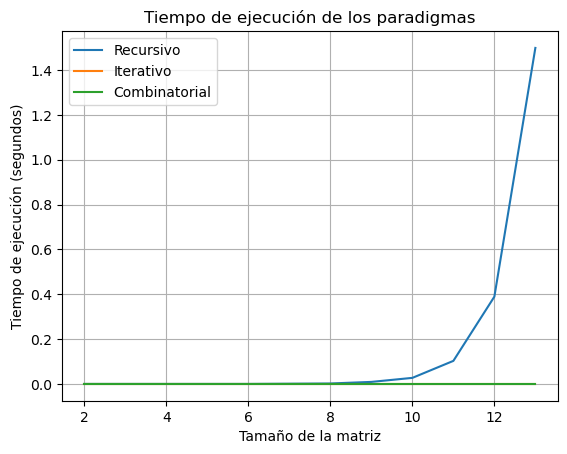

In [21]:
graficar_tiempos(13)